![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# The Challenge

<div class="alert alert-danger">
    Create a Linear Regression model from the following data:
</div>

In [1]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic').iloc[:, :4]
df_titanic

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
...,...,...,...,...
889,1,1,male,26.0
890,0,3,male,32.0


# The Covered Solution

<div class="alert alert-success">
    and reproduce the following plot ↓
</div>

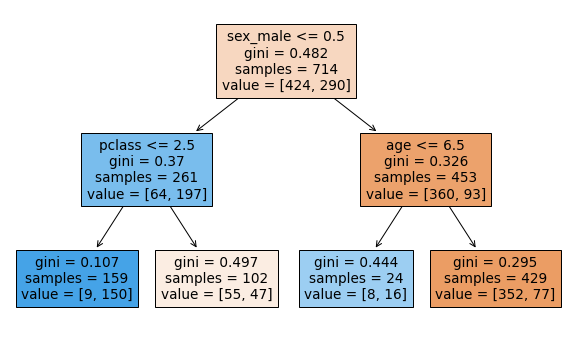

In [42]:
?? #! read the full story to find out the solution

# What will we learn?

- What is the difference between `Classifier` and `Regressor` Models?
- How to **preprocess** the data to `.fit()` the Model?
    - Why do we need all **columns to be numeric**?
    - How to handle **missing data**?
- Why aren't all the Models visualized in a `x-y` plot?
- What is the structure of a Decision Tree Model?
- How to assess categories to the outcome probabilities?
- How to measure `Classifiers`?
- What is the difference between Accuracy and R2?

# Which concepts will we use?

- Classifier
- Gini Impurity
- Dummy Variables
- Missing Data `NA`
- Decision Tree Structure
    - Root Node
    - Internal Nodes / Nodes
    - Leafs
- Confusion Matrix
    - Recall
        - Sensitivity
        - Especificity
    - ROC Curve

# Requirements?

- Pandas


# The starting *thing*

In [1]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic').iloc[:, :4]
df_titanic

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
...,...,...,...,...
889,1,1,male,26.0
890,0,3,male,32.0


# Syllabus for the [Notebook](01script_functions.ipynb)

1. Machine Learning, what does it mean?
2. How does the Decision Tree Algorithm computes the Mathematical Equation?
3. How do we compute a Decision Tree Model in Python?
    1. Import the Class
    2. Instantiate the Class
    3. Access the Function
4. Data for Exemplification
5. Separate the Variables
    1. Compute the Model
6. Data Preprocessing
    1. Dummy Variables
    2. Missing Data
7. Small Recap
8. The Decision Tree Model
    1. Compute the Mathematical Equation
    2. Model Visualization
    3. Model Interpretation
        1. 1st condition
        2. 2nd condition
        3. Leaf
    4. Model's Score
    5. Model's Score Explanation
9. Confusion Matrix
    1. Classification Report
    2. Sensitivity (Recall=1)
    3. Specificity (Recall=O)
    4. ROC Curve
10. RandomForestClassifier ( ) in Python
    1. Fit the Model
    2. Calculate Predictions
    3. Model's Score
11. SVC ( ) in Python
    1. Fit the Model
    2. Calculate Predictions
    3. Model's Score
12. Which One Is the Best Model? Why?

# The Uncovered Solution

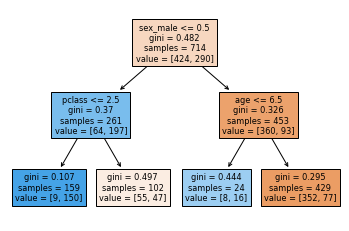

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df_titanic.dropna(inplace=True)
df_titanic = pd.get_dummies(df_titanic, drop_first=True)

explanatory = df_titanic.drop(columns='survived')
target = df_titanic.survived

model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=explanatory, y=target)

plot_tree(model_dt, feature_names=explanatory.columns, filled=True);

In [11]:
df_pred = df_titanic[['survived']].copy()
df_pred['pred_dt'] = model_dt.predict(X=explanatory)
df_pred

,survived,pred_dt
0,0,0
1,1,1
...,...,...
889,1,0
890,0,0


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
cm = confusion_matrix(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt
)

In [14]:
CM = ConfusionMatrixDisplay(cm)

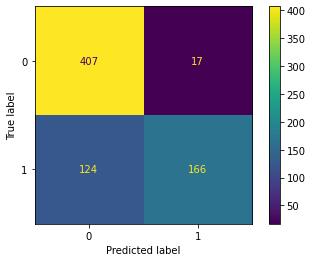

In [15]:
CM.plot();

In [16]:
from sklearn.metrics import classification_report

In [18]:
report = classification_report(
    y_true=df_pred.survived,
    y_pred=df_pred.pred_dt,
    output_dict=True
)

In [20]:
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.766478,0.907104,0.802521,0.836791,0.823595
recall,0.959906,0.572414,0.802521,0.766160,0.802521
f1-score,0.852356,0.701903,0.802521,0.777129,0.791248
support,424.000000,290.000000,0.802521,714.000000,714.000000


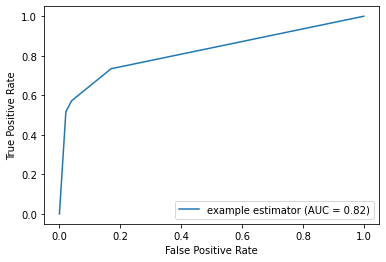

In [21]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> from sklearn import metrics
>>> y = df_pred.survived
>>> pred = model_dt.predict_proba(X=explanatory)[:,1]
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
>>> plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.